
Name: Rahmani Dibansa

Date: 23rd of August 2022

Description:
    This will contain my understanding of how the flower classification code works
    
Homework:
    The homework for lecture 3 is to understand and study the flower classification code that was
    provided. As such, I tried to explain how it works by adding my comments

Reference(s):
    ACMSIGGRAPH. SIGGRAPH Now | Hands-on Workshop: Machine Learning and Neural Networks – Lecture 3
    Retrieved from: https://www.youtube.com/watch?v=anASnKYImSI&list=PLUPhVMQuDB_b2kcOooEduedthcBH53mvC&index=3


In [1]:
#---------- Importing Packages 
# Import packages and use tensorflow version 2.x
#%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

#----------DATA READING 
# open the iris training csv
filename = 'iris_training.csv'

# read file
# Use pandas to read the csv file
# Retrieved from: https://www.w3schools.com/python/pandas/pandas_csv.asp
# A simple way to store big data sets is to use CSV files (comma separated files).
# CSV files contains plain text and is a well know format that can be read by everyone including Pandas.
# In our examples we will be using a CSV file called 'data.csv'.
csv_data = pd.read_csv(filename, sep=',')
print(csv_data.head())


   120    4  setosa  versicolor  virginica
0  6.4  2.8     5.6         2.2          2
1  5.0  2.3     3.3         1.0          1
2  4.9  2.5     4.5         1.7          2
3  4.9  3.1     1.5         0.1          0
4  5.7  3.8     1.7         0.3          0


![alt text](https://www.tensorflow.org/images/iris_three_species.jpg)

In [2]:
# The column names contains the features of the flower
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# The class name contains the different species
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

#----------DATA CLEANUP 
print( "\n======================================================================\n" )
# Label the features of the data by using the columns function
# new_header #set the header row as the data header
#
# Pandas DataFrame is a two-dimensional size-mutable, potentially heterogeneous 
# tabular data structure with labeled axes (rows and columns). Arithmetic operations 
# align on both row and column labels. It can be thought of as a dict-like container 
# for Series objects. This is the primary data structure of the Pandas.
# Retrived from: https://www.geeksforgeeks.org/python-pandas-dataframe-columns/
csv_data.columns = column_names 

# Display the first 5 rows to check whether the column names were
# properly allocated
print(csv_data.head()) 


print( "\n======================================================================\n" )
# look at simple data statistics by using transpose
print(csv_data.describe().transpose())



   sepal_length  sepal_width  petal_length  petal_width  species
0           6.4          2.8           5.6          2.2        2
1           5.0          2.3           3.3          1.0        1
2           4.9          2.5           4.5          1.7        2
3           4.9          3.1           1.5          0.1        0
4           5.7          3.8           1.7          0.3        0


              count      mean       std  min    25%  50%    75%  max
sepal_length  120.0  5.845000  0.868578  4.4  5.075  5.8  6.425  7.9
sepal_width   120.0  3.065000  0.427156  2.0  2.800  3.0  3.300  4.4
petal_length  120.0  3.739167  1.822100  1.0  1.500  4.4  5.100  6.9
petal_width   120.0  1.196667  0.782039  0.1  0.300  1.3  1.800  2.5
species       120.0  1.000000  0.840168  0.0  0.000  1.0  2.000  2.0


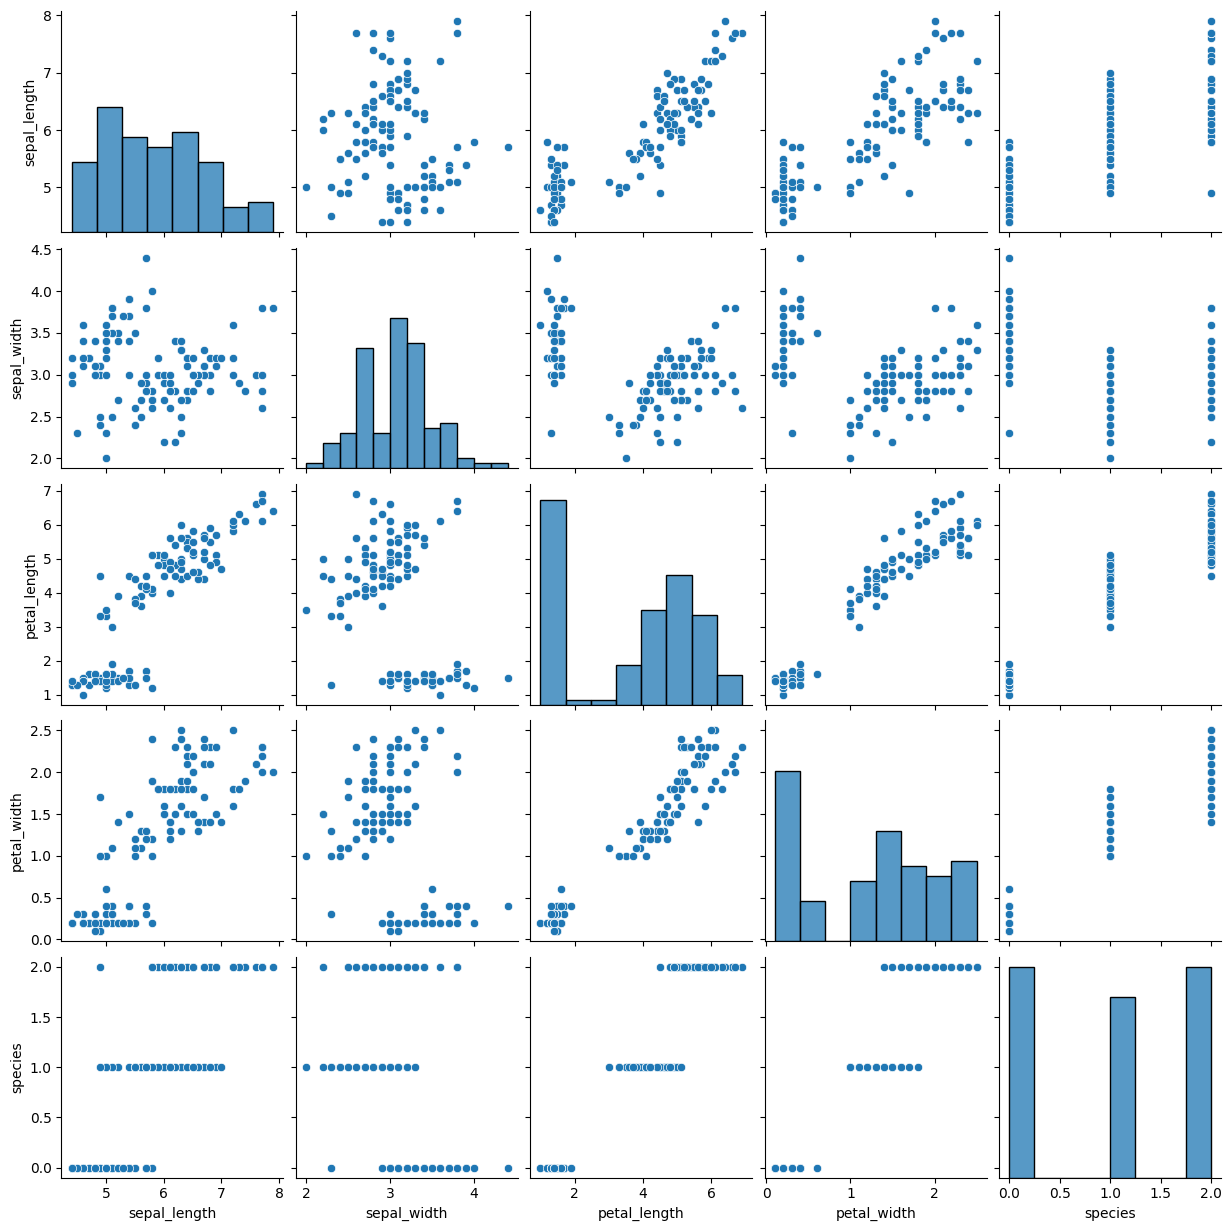

In [3]:
# Using pairplot, plot each features against
# all other features.
sns.pairplot(csv_data)

# Additional comments:
# Here we can see that there are clustering in the data
# However, since the plotting of the data points is of
# the same color. We can't differentiate which class
# has good clustering.

In [14]:
# Using seaborn, plot the csv data according
# to species. Set color codes to True so that
# we can properly differentiate the data
sns.set(style="ticks", color_codes=True)
sns.pairplot(csv_data, hue='species') 

In [15]:
#----------TRAIN/TEST SPLIT 
# Prepare 80% of the data as a sample
# for training the data, and the rest
# will be used as a test data
train_data = csv_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = csv_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features) for training
# use the features of the train data for x_train
# use the results(species), as the y_train
x_train = train_data.drop('species', axis=1)
y_train = train_data['species']

# normalize the training data
# Get the difference between the x train value and its minumum
# by using subtraction. Do that also with the maximum and minimum
# of the xtrain. Lastly, use division to get the normalized data
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())


# separate out the y (results) from x (features) testing
# Use the species column as the result
x_test = test_data.drop('species', axis=1)
y_test = test_data['species']

# normalize the test data
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 


# Display the statistics of the training data
print( "\n======================================================================\n" )
print(' Training Data: \n', x_train.describe().transpose())


# Display the statistics of the test data
print( "\n======================================================================\n" )
print(' Test Data: \n', x_test.describe().transpose())



 Training Data: 
               count      mean       std  min       25%       50%       75%  \
sepal_length   96.0  0.422024  0.243973  0.0  0.200000  0.400000  0.571429   
sepal_width    96.0  0.452257  0.186141  0.0  0.333333  0.416667  0.583333   
petal_length   96.0  0.473694  0.304463  0.0  0.097458  0.584746  0.694915   
petal_width    96.0  0.471354  0.324573  0.0  0.083333  0.541667  0.718750   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width   1.0  


 Test Data: 
               count      mean       std  min       25%       50%       75%  \
sepal_length   24.0  0.398990  0.282671  0.0  0.181818  0.348485  0.636364   
sepal_width    24.0  0.488095  0.237992  0.0  0.357143  0.500000  0.589286   
petal_length   24.0  0.410494  0.360276  0.0  0.037037  0.435185  0.777778   
petal_width    24.0  0.435606  0.361634  0.0  0.045455  0.431818  0.772727   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
pe

In [16]:
#--------MODEL BUILDING
# Use the keys/number of features in the training data 
# as the initial number of parameters
num_params = len(x_train.keys())
print(num_params)

# Build the sequention model
# The provided code for flower classification has these layers:
#       - 1 input layer that has an n amount of nodes(num_params)
#       - 2 hidden layers that each have 32 nodes, and a relu activation
#       - 1 output layer that has 3 nodes
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 3 nodes in the output for 'species'
    tf.keras.layers.Dense(3, name="Output_Layer")
  ])


# Compile the model
# RMSprop: Maintain a moving (discounted) average of the square of gradients
# SparseCategoricalCrossentropy : Computes the crossentropy loss between the labels and predictions. (I can't understand this part hahaha)
# metrics=["acc"] : represents the average training accuracy at the end of an epoch.
# val_acc: represents the accuracy of validation set at the and of an epoch.
learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              # list of metrics to monitor
              metrics=['acc',])


# Display the summary of the model
# Call model.summary() to print a useful summary of the model, which includes:
#         - Name and type of all layers in the model.
#         - Output shape for each layer.
#         - Number of weight parameters of each layer.
#         - If the model has general topology (discussed below), the inputs each layer receives
#         - The total number of trainable and non-trainable parameters of the model.
model.summary()

4
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_01 (Dense)            (None, 32)                160       
                                                                 
 dense_02 (Dense)            (None, 32)                1056      
                                                                 
 Output_Layer (Dense)        (None, 3)                 99        
                                                                 
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
_________________________________________________________________


In [8]:
#--------SANITY CHECK
# This is to check whether the data is good

# take an example batch and try to predict (we haven't trained yet!)
example_batch = x_train[:10]

# this gives the log likelihood of the the classes
example_result_log = model.predict(example_batch)
print('Likelihood', example_result_log)

# this gives the probabilities of the classes (should sum up to 1)
# Used for multi-class predictions. The sum of all outputs generated by softmax is 1.
example_result_prob = tf.nn.softmax(example_result_log).numpy()

# these values should be similar and equal to (1/3), because we haven't trained yet and weights are random
print('Probabilities', example_result_prob)




# These might be useful, I found it while reading an article on the internet:
# Keras Model Components
# Architecture/Configuration: Specifies what layers the model contains, and how they are connected.
# Weights: Input parameters that influence output in a Keras model.
# Optimizer: Optimizer/loss function used to minimize loss. 
#            Usage: One of two arguments required for compiling a Keras model:
#                       - Set of Losses and Metrics. 
#                       - When a model is compiled, compile() includes required losses and metrics: 
# Retrieved from: https://www.activestate.com/resources/quick-reads/how-to-use-a-model-to-do-predictions-with-keras/

1/1 [==============================] - 1s 844ms/step
Likelihood [[-0.15307894  0.00633463  0.0031082 ]
 [-0.055408   -0.01559106 -0.07508716]
 [-0.09688868 -0.02972173 -0.09408394]
 [-0.08740845  0.00923904 -0.02156623]
 [-0.09957436  0.03715259 -0.03191653]
 [-0.06412192  0.01451364 -0.03329192]
 [-0.09328594  0.03982925 -0.02731846]
 [-0.0765553  -0.01858212 -0.08061711]
 [-0.06714173 -0.01143386 -0.068822  ]
 [-0.13880995  0.06054338 -0.04791167]]
Probabilities [[0.29923385 0.3509483  0.3498178 ]
 [0.33100158 0.34444696 0.32455143]
 [0.3254909  0.34810403 0.32640508]
 [0.31550416 0.347519   0.3369768 ]
 [0.31089553 0.35644644 0.332658  ]
 [0.32122114 0.34750023 0.33127862]
 [0.3114708  0.3558185  0.3327106 ]
 [0.3272644  0.3467977  0.32593784]
 [0.3272669  0.34601563 0.3267175 ]
 [0.30158898 0.3681235  0.3302875 ]]


In [9]:
# Fit/TRAIN model on training data
# Once the model is created, you can config the model with losses and metrics with model.compile(),
# train the model with model.fit(), or use the model to do prediction with model.predict().
history = model.fit(x_train, y_train,
                    batch_size=4,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
19/19 [==============================] - 2s 29ms/step - loss: 1.0007 - acc: 0.6579 - val_loss: 0.9180 - val_acc: 0.7500
Epoch 2/10
19/19 [==============================] - 0s 11ms/step - loss: 0.9006 - acc: 0.6974 - val_loss: 0.8158 - val_acc: 0.8000
Epoch 3/10
19/19 [==============================] - 0s 8ms/step - loss: 0.8166 - acc: 0.7105 - val_loss: 0.7148 - val_acc: 0.8500
Epoch 4/10
19/19 [==============================] - 0s 9ms/step - loss: 0.7364 - acc: 0.7368 - val_loss: 0.6266 - val_acc: 0.9500
Epoch 5/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6641 - acc: 0.7763 - val_loss: 0.5591 - val_acc: 0.9000
Epoch 6/10
19/19 [==============================] - 0s 10ms/step - loss: 0.6066 - acc: 0.8289 - val_loss: 0.5034 - val_acc: 0.9000
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 0.5588 - acc: 0.8947 - val_loss: 0.4562 - val_acc: 0.9500
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5206 - acc: 

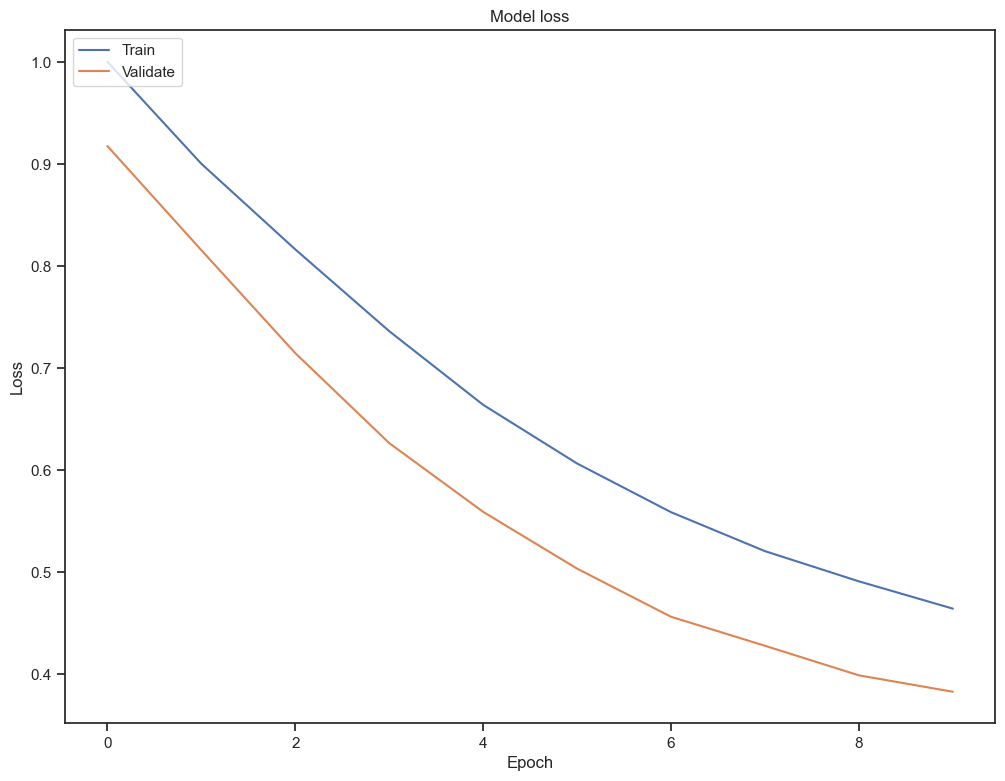

In [18]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [11]:
#--------EVALUATE
# Evaluate the model using the test features and test results/ground truth
# print out the Loss and Accuracy
#
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'Accuracy:', acc)


# Additional info I found while reading about loss, acc:
#           - the training loss is the average of the losses over each batch of training data. 
#             Because your model is changing over time, the loss over the first batches of an 
#             epoch is generally higher than over the last batches. On the other hand, the testing 
#             loss for an epoch is computed using the model as it is at the end of the epoch, 
#             resulting in a lower loss.
#           - Training should be stopped when val_acc stops increasing, 
#             otherwise your model will probably overffit. You can use 
#             earlystopping callback to stop training.
# Retrieved from: https://stackoverflow.com/questions/47299624/how-to-understand-loss-acc-val-loss-val-acc-in-keras-model-fitting


# What are loss and val_loss?
# In deep learning, the loss is the value that a neural network is trying to minimize: 
# it's the distance between the ground truth and the predictions. In order to minimize 
# this distance, the neural network learns by adjusting weights and biases in a manner 
# that reduces the loss.
#
# For instance, in regression tasks, you have a continuous target, e.g., height. What 
# you want to minimize is the difference between your predictions, and the actual height. 
# You can use mean_absolute_error as loss so the neural network knows this is what it 
# needs to minimize.
#
# In classification, it's a little more complicated, but very similar. Predicted classes 
# are based on probability. The loss is therefore also based on probability. In classification, 
# the neural network minimizes the likelihood to assign a low probability to the actual class. 
# The loss is typically categorical_crossentropy.
#
# loss and val_loss differ because the former is applied to the train set, and the latter the 
# test set. As such, the latter is a good indication of how the model performs on unseen data. 
# You can get a validation set by using validation_data=[x_test, y_test] or validation_split=0.2. ( I don't understand this line hahaha )
#
# It's best to rely on the val_loss to prevent overfitting. Overfitting is when the model fits 
# the training data too closely, and the loss keeps decreasing while the val_loss is stale, or 
# increases.

# In Keras, you can use EarlyStopping to stop training when the val_loss stops decreasing. ( Useful knowledge)



1/1 - 0s - loss: 0.6028 - acc: 0.8333 - 408ms/epoch - 408ms/step
Loss: 0.6028406620025635 Accuracy: 0.8333333134651184


In [12]:
#--------PREDICT
p_test = model.predict(x_test) # get the log likelihoods
p_test_probabs = tf.nn.softmax(p_test).numpy() # convert to probabilities
p_test_class = np.argmax(p_test_probabs, axis=1) # get the max out of the 3 probabilities
print("Predicted Class:", p_test_class, '\nActuals:\n', y_test.to_string(index=False))
#p_test = model.predict_classes(x_test)
#print(p_test)

# Useful info for argmax
# Retrieved from: https://stackoverflow.com/questions/36300334/understanding-argmax
#   - argmax returns the position/index of the largest value.
# 
# With this matrix:
#       matrix = np.array([[1,2,3],[4,5,6],[7,8,9], [9, 9, 9]])
# When argmax is used: 
#       np.argmax(matrix)
# Output:
#       8
# In argmax, python will convert array to one dimension, so array will look like:
#       array([1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9])
#       Index  0  1  2  3  4  5  6  7  8  9  10 11

1/1 [==============================] - 0s 52ms/step
Predicted Class: [1 0 0 2 2 2 0 2 1 2 1 2 1 1 1 1 1 0 2 2 1 1 2 1] 
Actuals:
 1
0
0
2
2
2
0
2
2
2
2
2
2
2
1
1
1
0
2
2
1
1
2
1


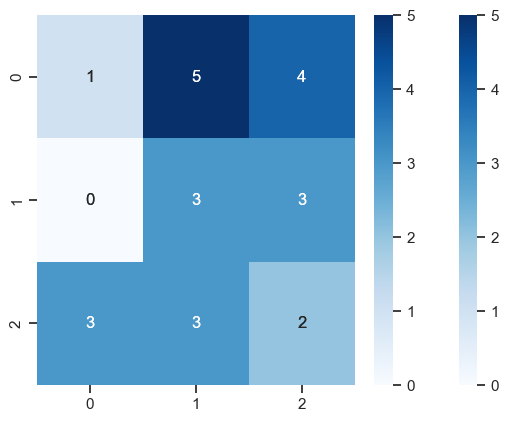

In [20]:
# plot the confision matrix as heatmap
sns.heatmap(tf.math.confusion_matrix(y_test, p_test_class), cmap="Blues", annot=True)
plt.show()